В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

In [ ]:
# подгружаем необходимые библиотеки
from sklearn.svm import OneClassSVM
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager
%matplotlib inline
from pylab import rcParams

## 1.Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [ ]:
data = pd.read_csv('glass.csv')

In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Информация об атрибутах:


---


Id number: 1 to 214

RI: показатель преломления

Na: натрий (единица измерения: весовой процент в соответствующем оксиде, как атрибуты 4-10)

Mg: магний

Al: алюминий

Si: кремний

K: калий

Ca: кальций

Ba: барий

Fe: железо

Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

## 2.Проведите первичный анализ. а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Пропусков нет. Данные **не** сбалансированы.

## 3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Type'),
                                                    data['Type'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((171, 9), (43, 9))

## 4.Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [ ]:
tree = RandomForestClassifier(random_state=42)
tree.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5.Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [ ]:
pred_tree=tree.predict(X_test)

In [ ]:
accuracy_tree=metrics.accuracy_score(y_test, pred_tree)
accuracy_tree

0.8372093023255814

Модель дерева решений делает прогноз с точностью 83,72%. Но на несбалансированных данных метрика accuracy может быть обманчивой. В нашем случае лучше использовать метрику F1

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_tree=f1_score(y_test, pred_tree, average='weighted') # weighted означает, что набор данных несбалансированный
f1_tree

0.8330452594474481

## 6.Обработайте выбросы в данных. а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

Сначала построим графики распределения.




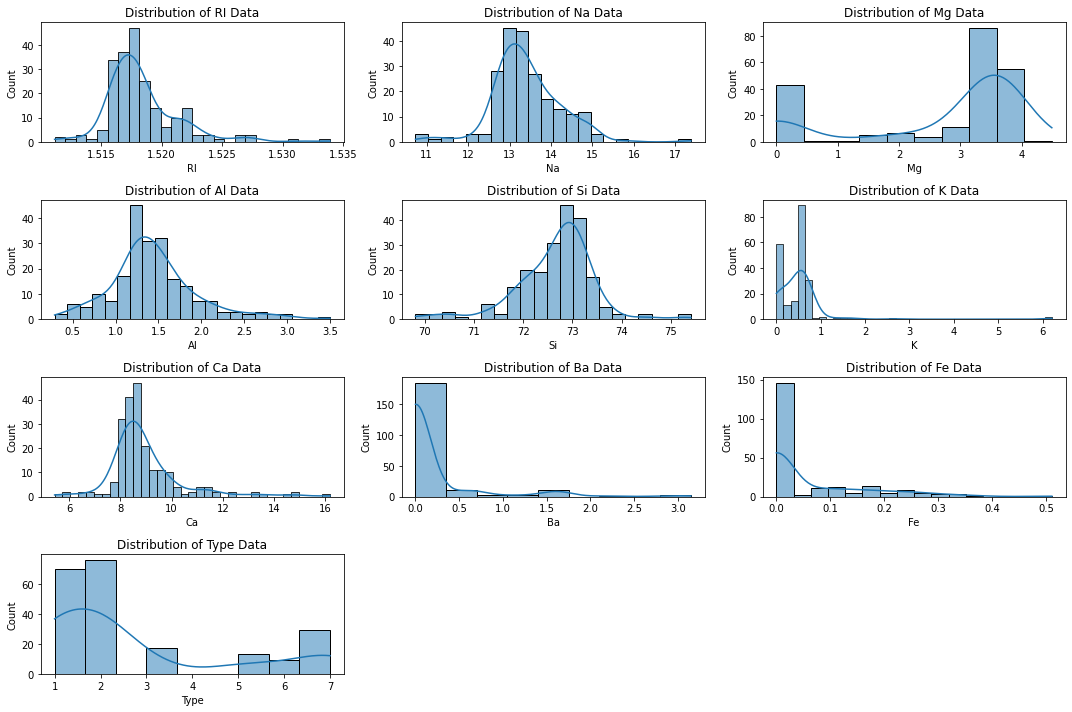

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

Только несколько признаков имеют распределение близкое к нормальному - RI, Na, Al, Si, Ca, но у всех этих признаков присутствует ассиметрия кривой, скорее всего из-за выбросов.

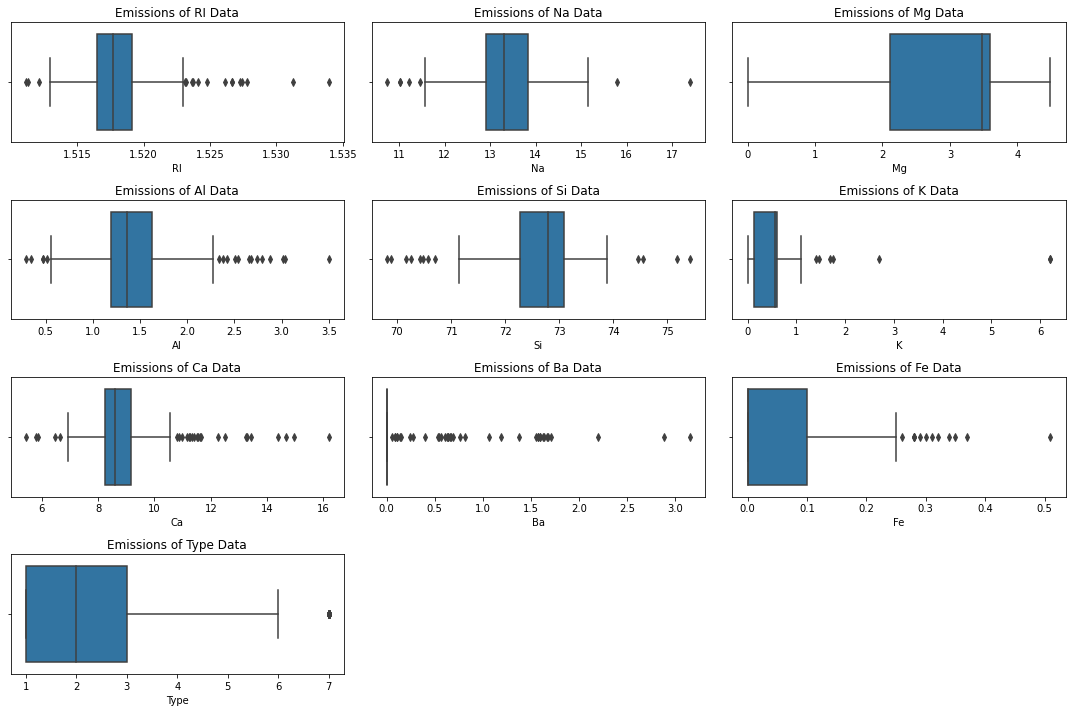

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Emissions of {col} Data")
    sns.boxplot(x=data[col])
    plt.tight_layout()
    plt.plot()

In [ ]:
data[['Ba', 'Fe']].describe()

,Ba,Fe
count,214.000000,214.000000
mean,0.175047,0.057009
std,0.497219,0.097439
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.100000
max,3.150000,0.510000


По Mg выбросов нет, по Ba - есть только выбросы, по Fe - данные начинаются от медианы и есть выбросы.

## b) Исследуйте признаки на выбросы несколькими способами. c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.7.Повторите п. 4, п. 5.

### Интерквантильный разброс

In [ ]:
data_iqr=data.copy()

In [ ]:
q1 = data['RI'].quantile(0.25)
q3 = data['RI'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_iqr.drop(data_iqr[~data_iqr['RI'].between(lower_bound, upper_bound, inclusive=True)].index,inplace=True)

In [ ]:
q1 = data['Na'].quantile(0.25)
q3 = data['Na'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_iqr.drop(data_iqr[~data_iqr['Na'].between(lower_bound, upper_bound, inclusive=True)].index, inplace=True)

In [ ]:
q1 = data['Al'].quantile(0.25)
q3 = data['Al'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_iqr.drop(data_iqr[~data_iqr['Al'].between(lower_bound, upper_bound, inclusive=True)].index, inplace=True)

In [ ]:
q1 = data['Si'].quantile(0.25)
q3 = data['Si'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_iqr.drop(data_iqr[~data_iqr['Si'].between(lower_bound, upper_bound, inclusive=True)].index, inplace=True)

In [ ]:
q1 = data['K'].quantile(0.25)
q3 = data['K'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_iqr.drop(data_iqr[~data_iqr['K'].between(lower_bound, upper_bound, inclusive=True)].index, inplace=True)

In [ ]:
q1 = data['Ca'].quantile(0.25)
q3 = data['Ca'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_iqr.drop(data_iqr[~data_iqr['Ca'].between(lower_bound, upper_bound, inclusive=True)].index, inplace=True)

In [ ]:
q1 = data['Ba'].quantile(0.25)
q3 = data['Ba'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data_iqr.drop(data_iqr[~data_iqr['Ba'].between(lower_bound, upper_bound, inclusive=True)].index, inplace=True)

In [ ]:
losses_dict = {'1 класс': round(100 * (len(data[data.Type == 1]) - len(data_iqr[data_iqr.Type == 1]))/len(data[data.Type == 1])),
               '2 класс': round(100 * (len(data[data.Type == 2]) - len(data_iqr[data_iqr.Type == 2]))/len(data[data.Type == 2])),
               '3 класс': round(100 * (len(data[data.Type == 3]) - len(data_iqr[data_iqr.Type == 3]))/len(data[data.Type == 3])),
               '5 класс': round(100 * (len(data[data.Type == 5]) - len(data_iqr[data_iqr.Type == 5]))/len(data[data.Type == 5])),
               '6 класс': round(100 * (len(data[data.Type == 6]) - len(data_iqr[data_iqr.Type == 6]))/len(data[data.Type == 6])),
               '7 класс': round(100 * (len(data[data.Type == 7]) - len(data_iqr[data_iqr.Type == 7]))/len(data[data.Type == 7])),
               'всего': round(100 * (len(data) - len(data_iqr))/len(data))}
losses = pd.Series(losses_dict)
df_1 = pd.DataFrame(losses, columns=['losses_iqr, %'])
df_1

,"losses_iqr, %"
1 класс,13
2 класс,22
3 класс,6
5 класс,85
6 класс,44
7 класс,100
всего,33


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_iqr.drop(columns='Type'),
                                                    data_iqr['Type'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((114, 9), (29, 9))

In [ ]:
tree_iqr = RandomForestClassifier(random_state=42)
tree_iqr.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_tree_iqr=tree_iqr.predict(X_test)

In [ ]:
accuracy_tree_iqr=metrics.accuracy_score(y_test, pred_tree_iqr)
accuracy_tree_iqr

0.7931034482758621

Точность модели ухудшилась с 83,72% до 79,31%. Проверим метрику F1

In [ ]:
f1_tree_iqr=f1_score(y_test, pred_tree_iqr, average='weighted')
f1_tree_iqr

0.7931034482758621

Метрика F1 тоже ухудшилась. Теперь она полностью совпадает с accuracy

### Изолирующий лес

In [ ]:
data_iso=data.copy()

In [ ]:
X = data[data.columns[:-1]]

In [ ]:
model = IsolationForest()
model.fit(X)

IsolationForest()

In [ ]:
data_iso['iforest']=pd.Series(model.predict(X))
data_iso['iforest'].value_counts()

 1    189
-1     25
Name: iforest, dtype: int64

In [ ]:
data_iso.drop(data_iso[data_iso['iforest'] == -1].index, inplace = True)

In [ ]:
data_iso.drop(['iforest'], axis=1, inplace = True)

In [ ]:
losses_dict = {'1 класс': round(100 * (len(data[data.Type == 1]) - len(data_iso[data_iso.Type == 1]))/len(data[data.Type == 1])),
               '2 класс': round(100 * (len(data[data.Type == 2]) - len(data_iso[data_iso.Type == 2]))/len(data[data.Type == 2])),
               '3 класс': round(100 * (len(data[data.Type == 3]) - len(data_iso[data_iso.Type == 3]))/len(data[data.Type == 3])),
               '5 класс': round(100 * (len(data[data.Type == 5]) - len(data_iso[data_iso.Type == 5]))/len(data[data.Type == 5])),
               '6 класс': round(100 * (len(data[data.Type == 6]) - len(data_iso[data_iso.Type == 6]))/len(data[data.Type == 6])),
               '7 класс': round(100 * (len(data[data.Type == 7]) - len(data_iso[data_iso.Type == 7]))/len(data[data.Type == 7])),
               'всего': round(100 * (len(data) - len(data_iso))/len(data))}
losses = pd.Series(losses_dict)
df_2 = pd.DataFrame(losses, columns=['losses_iso, %'])
df_2

,"losses_iso, %"
1 класс,0
2 класс,13
3 класс,6
5 класс,46
6 класс,22
7 класс,21
всего,12


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_iso.drop(columns='Type'),
                                                    data_iso['Type'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((151, 9), (38, 9))

In [ ]:
iso = RandomForestClassifier(random_state=42)
iso.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_iso=iso.predict(X_test)

In [ ]:
accuracy_iso=metrics.accuracy_score(y_test, pred_iso)
accuracy_iso

0.8157894736842105

In [ ]:
f1_iso=f1_score(y_test, pred_iso, average='weighted')
f1_iso

0.8102593440122043

### OCSVM

In [ ]:
data_OCSVM=data.copy()

In [ ]:
model_1 = svm.OneClassSVM(nu=0.07)
model_1.fit(X)

OneClassSVM(nu=0.07)

In [ ]:
data_OCSVM['OCSVM']=pd.Series(model_1.predict(X))
data_OCSVM['OCSVM'].value_counts()

 1    199
-1     15
Name: OCSVM, dtype: int64

In [ ]:
data_OCSVM.drop(data_OCSVM[data_OCSVM['OCSVM'] == -1].index, inplace = True)

In [ ]:
data_OCSVM.drop(['OCSVM'], axis=1, inplace = True)

In [ ]:
losses_dict = {'1 класс': round(100 * (len(data[data.Type == 1]) - len(data_OCSVM[data_OCSVM.Type == 1]))/len(data[data.Type == 1])),
               '2 класс': round(100 * (len(data[data.Type == 2]) - len(data_OCSVM[data_OCSVM.Type == 2]))/len(data[data.Type == 2])),
               '3 класс': round(100 * (len(data[data.Type == 3]) - len(data_OCSVM[data_OCSVM.Type == 3]))/len(data[data.Type == 3])),
               '5 класс': round(100 * (len(data[data.Type == 5]) - len(data_OCSVM[data_OCSVM.Type == 5]))/len(data[data.Type == 5])),
               '6 класс': round(100 * (len(data[data.Type == 6]) - len(data_OCSVM[data_OCSVM.Type == 6]))/len(data[data.Type == 6])),
               '7 класс': round(100 * (len(data[data.Type == 7]) - len(data_OCSVM[data_OCSVM.Type == 7]))/len(data[data.Type == 7])),
               'всего': round(100 * (len(data) - len(data_OCSVM))/len(data))}
losses = pd.Series(losses_dict)
df_3 = pd.DataFrame(losses, columns=['losses_OCSVM, %'])
df_3

,"losses_OCSVM, %"
1 класс,0
2 класс,9
3 класс,0
5 класс,23
6 класс,11
7 класс,14
всего,7


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_OCSVM.drop(columns='Type'),
                                                    data_OCSVM['Type'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((159, 9), (40, 9))

In [ ]:
OCSVM = RandomForestClassifier(random_state=42)
OCSVM.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_OCSVM=OCSVM.predict(X_test)

In [ ]:
accuracy_OCSVM=metrics.accuracy_score(y_test, pred_OCSVM)
accuracy_OCSVM

0.85

In [ ]:
f1_OCSVM=f1_score(y_test, pred_OCSVM, average='weighted')
f1_OCSVM

0.8232715402876695

## 8.Сформулируйте выводы по проделанной работе. а) Кратко опишите, какие преобразования были сделаны с данными. b) Сравните точность двух моделей. c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

В процессе выполнения задания была проведена следующая работа с данными:
1. Проведен EDA;
2. На необработанных данных создана и обучена модель RandomForestClassifier;
3. Признаки исследованы на выбросы при помощи статистических тестов;
4. Признаки исследованы на выбросы при помощи методов машинного обучения (метод опорных векторов для одного класса, изолирующий лес);
5. После удаления выбросов для каждого способа, созданы  и обучены ещё три модели RandomForestClassifier.

In [ ]:
df = pd.concat([df_1, df_2, df_3], axis=1)
df

,"losses_iqr, %","losses_iso, %","losses_OCSVM, %"
1 класс,13,0,0
2 класс,22,13,9
3 класс,6,6,0
5 класс,85,46,23
6 класс,44,22,11
7 класс,100,21,14
всего,33,12,7


In [ ]:
accuracy_dict = {'tree_full': accuracy_tree,
            'tree_iqr': accuracy_tree_iqr,
            'tree_iso': accuracy_iso,
            'tree_OCSVM': accuracy_OCSVM}
accuracy_dict = pd.Series(accuracy_dict)

f1_dict = {'tree_full': f1_tree,
            'tree_iqr': f1_tree_iqr,
            'tree_iso': f1_iso,
            'tree_OCSVM': f1_OCSVM}
f1_dict = pd.Series(f1_dict)

res = pd.DataFrame({'accuracy': accuracy_dict, 'f1': f1_dict})
res
res.style.highlight_max(color = 'lightgreen', axis = 0)

,accuracy,f1
tree_full,0.837209,0.833045
tree_iqr,0.793103,0.793103
tree_iso,0.815789,0.810259
tree_OCSVM,0.850000,0.823272


Ислледовать данные на выбросы необходимо. Выброс - это результат измерения, не попадающий под общее распределение. В большинстве случаев выбросы появляются в результате каких-либо ошибочных действий. Поэтому, если выбросы не удалять, это  понизит производительность модели. Модель изучит шаблоны набора данных, а также ошибки и шумы из значений выбросов. Следовательно, мы должны удалить их до этапа обучения.

Из использованных в работе методов исследования выбросов, наилучший результат показал метод опорных векторов для одного класса: у него лучшие показатели метрики при самом маленьком % удалённых данных.